In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error,accuracy_score
pd.pandas.set_option('display.max_columns',None)

In [2]:
dt=pd.read_csv('india_housing_prices.csv')

In [3]:
dt.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [4]:
city_avg = dt.groupby('City')['Price_per_SqFt'].mean()
dt['City'] = dt['City'].map(city_avg)

In [5]:
dt.drop(columns=['ID','Year_Built'],inplace=True)

In [6]:
# dt['City'].value_counts()

In [7]:
# dt['State'].value_counts()

In [8]:
LE=LabelEncoder()
dt['Facing'] = LE.fit_transform(dt['Facing'])
dt['State'] = LE.fit_transform(dt['State'])
dt['Owner_Type'] = LE.fit_transform(dt['Owner_Type'])

In [9]:
dt['Locality'] = dt['Locality'].str.split("_").apply(lambda x: x[1])

In [10]:
dt['Locality']=dt['Locality'].astype(int)

In [11]:
dt['Property_Type'].value_counts()

,count
Property_Type,
Villa,83744
Independent House,83300
Apartment,82956


In [12]:
dt['Furnished_Status'].value_counts()

,count
Furnished_Status,
Unfurnished,83408
Semi-furnished,83374
Furnished,83218


In [13]:
dt['Public_Transport_Accessibility'].value_counts()

,count
Public_Transport_Accessibility,
High,83705
Low,83287
Medium,83008


In [14]:
dt['Parking_Space'].value_counts()

,count
Parking_Space,
No,125456
Yes,124544


In [15]:
dt['Security'].value_counts()

,count
Security,
Yes,125233
No,124767


In [16]:
dt['Availability_Status'].value_counts()

,count
Availability_Status,
Under_Construction,125035
Ready_to_Move,124965


In [17]:
cols_to_encode = ['Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility','Availability_Status','Security','Parking_Space']

In [18]:
encoder = OrdinalEncoder(categories=[
    ['Apartment', 'Independent House', 'Villa'],
    ['Unfurnished','Semi-furnished','Furnished'],
    ['Low','Medium','High'],
    ['Under_Construction','Ready_to_Move'],
    ['No','Yes'],
    ['No','Yes']
])


In [19]:
dt[cols_to_encode]=encoder.fit_transform(dt[cols_to_encode])

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
dt['Amenities'] = dt['Amenities'].apply(lambda x: [i.strip() for i in x.split(',') if i.strip() != ''])

mlb = MultiLabelBinarizer()

amenities_encoded = mlb.fit_transform(dt['Amenities'])

amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)

dt = pd.concat([dt, amenities_df], axis=1)


In [21]:
dt.drop(columns=['Amenities'],inplace=True)

In [22]:
# dt['Amenities']=dt['Clubhouse']+dt['Garden']+dt['Gym']+dt['Playground']+dt['Pool']

In [23]:
# dt.drop(columns=['Clubhouse','Garden','Gym','Playground','Pool'],inplace=True)

In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           250000 non-null  int64  
 1   City                            250000 non-null  float64
 2   Locality                        250000 non-null  int64  
 3   Property_Type                   250000 non-null  float64
 4   BHK                             250000 non-null  int64  
 5   Size_in_SqFt                    250000 non-null  int64  
 6   Price_in_Lakhs                  250000 non-null  float64
 7   Price_per_SqFt                  250000 non-null  float64
 8   Furnished_Status                250000 non-null  float64
 9   Floor_No                        250000 non-null  int64  
 10  Total_Floors                    250000 non-null  int64  
 11  Age_of_Property                 250000 non-null  int64  
 12  Nearby_Schools  

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(dt.drop(columns=['Price_in_Lakhs']),dt['Price_in_Lakhs'],test_size=0.2,random_state=42)

In [26]:
X_train.shape

(200000, 24)

/tmp/ipython-input-27-2163986655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train)


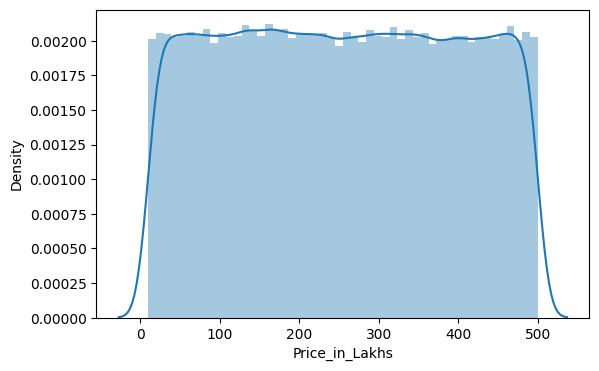

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(Y_train)
plt.show()

In [28]:
Y_train.skew()

np.float64(0.007770727715464974)

In [29]:
for i in X_train.columns:
    print(i)
    print(X_train[i].skew())

State
-0.0027247838075917684
City
-0.00149636481366666
Locality
0.003340257704842517
Property_Type
-0.007375382278311796
BHK
9.869133901485633e-05
Size_in_SqFt
0.002462285248692164
Price_per_SqFt
2.3201529875831826
Furnished_Status
0.000835937516965762
Floor_No
0.009100651710814483
Total_Floors
-9.611348295414549e-05
Age_of_Property
-0.0004384748609295698
Nearby_Schools
-0.000936889749587162
Nearby_Hospitals
0.0014436442910306284
Public_Transport_Accessibility
-0.0012873008132658675
Parking_Space
0.0067800898093343595
Security
-0.0007600057549272013
Facing
-0.0052468022646457065
Owner_Type
0.0014054353481746695
Availability_Status
6.000045003129896e-05
Clubhouse
-0.4121021566956299
Garden
-0.41176157745691505
Gym
-0.40886803791687676
Playground
-0.40506337921467744
Pool
-0.4093359430167162


In [30]:
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, Y_train)
y_pred_dt = dtree_reg.predict(X_test)
mse_dt = mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)
print(f"Decision Tree Regressor - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, Y_train)

# Predict
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


In [33]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='mean_absolute_error',optimizer='Adam')

In [37]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 156.4205 - val_loss: 86.0073
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 82.1399 - val_loss: 50.3265
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 38.3789 - val_loss: 26.3273
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 25.4465 - val_loss: 24.3668
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 24.1306 - val_loss: 24.1023
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 23.9854 - val_loss: 24.0173
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 23.8791 - val_loss: 23.8689
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 23.8860 - val_loss: 23.8864
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 23.7052 - val_loss: 23.7421
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 23.4715 - val_loss: 23.5178


In [38]:
y_pred_dl=model.predict(X_test)
r2_score(Y_test, y_pred_dl)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


0.9455972912810076

In [39]:
mean_squared_error(Y_test, y_pred_dl)

1084.5455009345349

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, Y_train)
y_pred_svr = svr.predict(X_test)

In [ ]:
r2 = r2_score(Y_test, y_pred_svr)
mse = mean_squared_error(Y_test, y_pred_svr)
mae = mean_absolute_error(Y_test, y_pred_svr)

In [ ]:
print(f"SVR R² Score     : {r2:.4f}")
print(f"SVR MSE          : {mse:.2f}")
print(f"SVR MAE          : {mae:.2f}")